# CMPINF 2100: Midterm exam

## YOUR NAME HERE !!!!

You may add as many code and markdown cells as you see fit to answer the questions.

## You are NOT allowed to collaborate with anyone on this exam.

### Overview

You will demonstrate your ability to merge, group, summarize, visualize, and find patterns in data. This exam uses data associated with a manufacturing example. An overview of the goals, considerations, CSV files, and variables within the data is provided in a presentation on Canvas. Please read through those slides before starting the exam.

The data are provided in 5 separate CSV files. The CSV files are available on Canvas. You **MUST** download the files and save them to the same working directory as this notebook.

The specific instructions in this notebook tell you when you must JOIN the data together. Please read the problems carefully.

The overall objective of this exam is to JOIN data from multiple files in order to explore and find interesting patterns between the machine operating conditions and supplier information. You will report your findings within this notebook by displaying Pandas DataFrames and statistical visualizations via Seaborn and matplotlib when necessary.  

## Import modules

You are permitted to use the following modules on this exam.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

You may also use the following functions from scikit-learn on this exam.

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

You may also use the following sub module from SCIPY.

In [5]:
from scipy.cluster import hierarchy

You are **NOT** permitted to use any other modules or functions. However, you **ARE** permitted to create your own user defined functions if you would like.

## Problem 01

The file names for the 3 machine data sets are provided as strings in the cell below. You are required to read in the CSV files and assign the data to the `m01_df`, `m02_df`, and `m03_df` objects. The data from machine 1 will therefore be associated with `m01_df`, machine 2 is associated with `m02_df`, and machine 3 is associated with `m03_df`.  

In this problem you must explore each of the three machine data sets. 

You must perform the following **ESSENTIAL** activities:

* How many rows and columns are in each data set? 
* What are the names and data types for each column?
* How many unique values are there for each column?
* How many missing values are there for each column?

You must visually explore the MARGINAL behavior of the variables in the data. You must use visualizations appropriate for the DATA TYPE of the columns.

You must visually explore RELATIONSHIPS between variables in the data. You must use visualizations appropriate for the DATA TYPES. You must make sure that your visualizations can answer the following questions:

* How many unique values for `Batch` are associated with each MACHINE (data set)?
* How many cell phone cases are associated with each `Batch` value for each MACHINE (data set)?
* Do the summary statistics of the OPERATING VARIABLES `x1` through `x4` vary across the three MACHINES?
* Do the summary statistics of the OPERATING VARIABLES `x1` through `x4` vary across the `Batch` values?
* Do the relationships between the OPERATING VARIABLES `x1` through `x4` vary across the three MACHINES?
* Do the relationships between the OPERATING VARIABLES `x1` through `x4` vary across the `Batch` values?

At the conclusion of this problem, you **MUST** CONCATENATE the 3 MACHINE data sets into a single DataFrame. The single DataFrame must be named `machine_df`. Before concatenating, you **MUST** add a column `machine_id` to each DataFrame with the correct index value for that machine (1, 2, or 3). The concatenating DataFrame variable name is provided as a reminder to you below. 

You may add as many markdown and code cells as you see fit to answer this question. Include markdown cells stating what you see in the figures and why you selected to use them.

### SOLUTION

In [6]:
# Define the files's for the 3 machine level CSV files

file_m01 = 'midterm_machine_01.csv'

file_m02 = 'midterm_machine_02.csv'

file_m03 = 'midterm_machine_03.csv'

In [7]:
# read in the CSV files and name them accordingly

m01_df = pd.read_csv(file_m01)

m02_df = pd.read_csv(file_m02)

m03_df = pd.read_csv(file_m03)

#### Analyze `m01_df`

In [83]:
# shape of the dataframe

m01_df.shape

(5152, 8)

In [21]:
m01_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5119 entries, 0 to 5118
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      5119 non-null   object 
 1   Batch   5119 non-null   int64  
 2   s_id    5119 non-null   int64  
 3   x1      5119 non-null   float64
 4   x2      5119 non-null   float64
 5   x3      5119 non-null   float64
 6   x4      5119 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 280.1+ KB


In [23]:
m01_df['machine'] = 'm01'

In [35]:
m02_df['machine'] = 'm02'

In [36]:
m03_df['machine'] = 'm03'

In [37]:
machine_df = pd.concat([m01_df, m02_df, m03_df])
machine_df.head()

ID  Batch  s_id         x1          x2         x3         x4  \
0  B001-M01-S001      1     1  50.117118  102.167346  22.067812  13.889524   
1  B001-M01-S002      1     2  46.887333  112.266102  23.197330  13.064709   
2  B001-M01-S003      1     3  50.132744  103.674908  22.319933  13.647482   
3  B001-M01-S004      1     4  48.501042  107.143156  22.162947  14.077758   
4  B001-M01-S005      1     5  49.690442  102.120283  22.248696  13.728666   

  machine  
0     m01  
1     m01  
2     m01  
3     m01  
4     m01

In [105]:
m03_df.Batch.value_counts()

Batch
5     141
21    141
12    140
43    133
19    127
32    127
37    127
33    127
42    122
34    121
41    120
2     120
9     119
29    117
48    115
46    115
26    113
22    112
45    112
40    111
13    110
36    110
27    109
38    108
31    106
6     106
49    104
24    103
3     103
44    102
4     102
20    100
17    100
16     94
14     94
1      85
23     84
35     77
15     76
28     72
47     53
Name: count, dtype: int64

In [45]:
machine_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14729 entries, 0 to 4457
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       14729 non-null  object 
 1   Batch    14729 non-null  int64  
 2   s_id     14729 non-null  int64  
 3   x1       14729 non-null  float64
 4   x2       14729 non-null  float64
 5   x3       14729 non-null  float64
 6   x4       14729 non-null  float64
 7   machine  14729 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 1.0+ MB


In [90]:
df_features = machine_df.select_dtypes('number').copy()
df_objects = machine_df.select_dtypes('object').copy()
id_cols = ['rowid', 'Batch', 's_id'] + df_objects.columns.to_list()
df_lf = machine_df.reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=id_cols, value_vars=df_features.columns)

In [91]:
df_lf

rowid  Batch  s_id             ID machine variable      value
0          0      1     1  B001-M01-S001     m01       x1  50.117118
1          1      1     2  B001-M01-S002     m01       x1  46.887333
2          2      1     3  B001-M01-S003     m01       x1  50.132744
3          3      1     4  B001-M01-S004     m01       x1  48.501042
4          4      1     5  B001-M01-S005     m01       x1  49.690442
...      ...    ...   ...            ...     ...      ...        ...
58911   4453     49   100  B049-M03-S100     m03       x4  13.753264
58912   4454     49   101  B049-M03-S101     m03       x4  13.636539
58913   4455     49   102  B049-M03-S102     m03       x4  13.678206
58914   4456     49   103  B049-M03-S103     m03       x4  13.880084
58915   4457     49   104  B049-M03-S104     m03       x4  13.853014

[58916 rows x 7 columns]

In [124]:
type(machine_df.groupby('machine').Batch.nunique())

pandas.core.series.Series

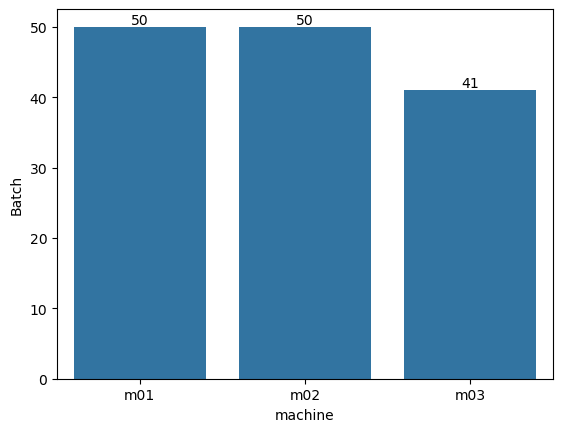

In [130]:
fig, ax = plt.subplots()
ax = sns.barplot(machine_df.groupby('machine').Batch.nunique())
ax.bar_label(ax.containers[0], fontsize=10);

There are 50 unique values for `Batch` in machine 1, machine 2 and 41 in the machine 3

In [136]:
machine_df.groupby('machine').Batch.value_counts()

machine  Batch
m01      36       149
         40       148
         33       140
         12       135
         29       134
                 ... 
m03      23        84
         35        77
         15        76
         28        72
         47        53
Name: count, Length: 141, dtype: int64

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

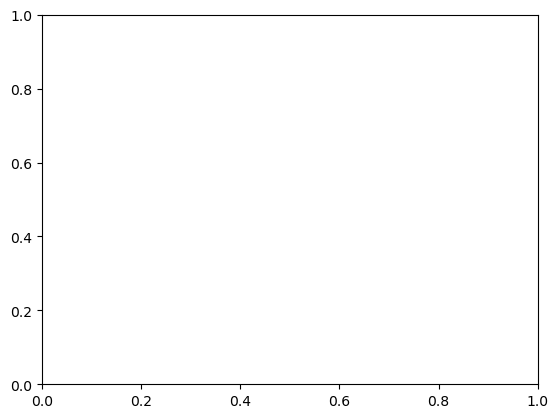

In [139]:
fig, ax = plt.subplots()
ax = sns.barplot(machine_df.groupby('machine').Batch.value_counts(), x='Batch')
ax.bar_label(ax.containers[0], fontsize=10);

In [140]:
machine_df.groupby('machine').Batch.value_counts()

machine  Batch
m01      36       149
         40       148
         33       140
         12       135
         29       134
                 ... 
m03      23        84
         35        77
         15        76
         28        72
         47        53
Name: count, Length: 141, dtype: int64

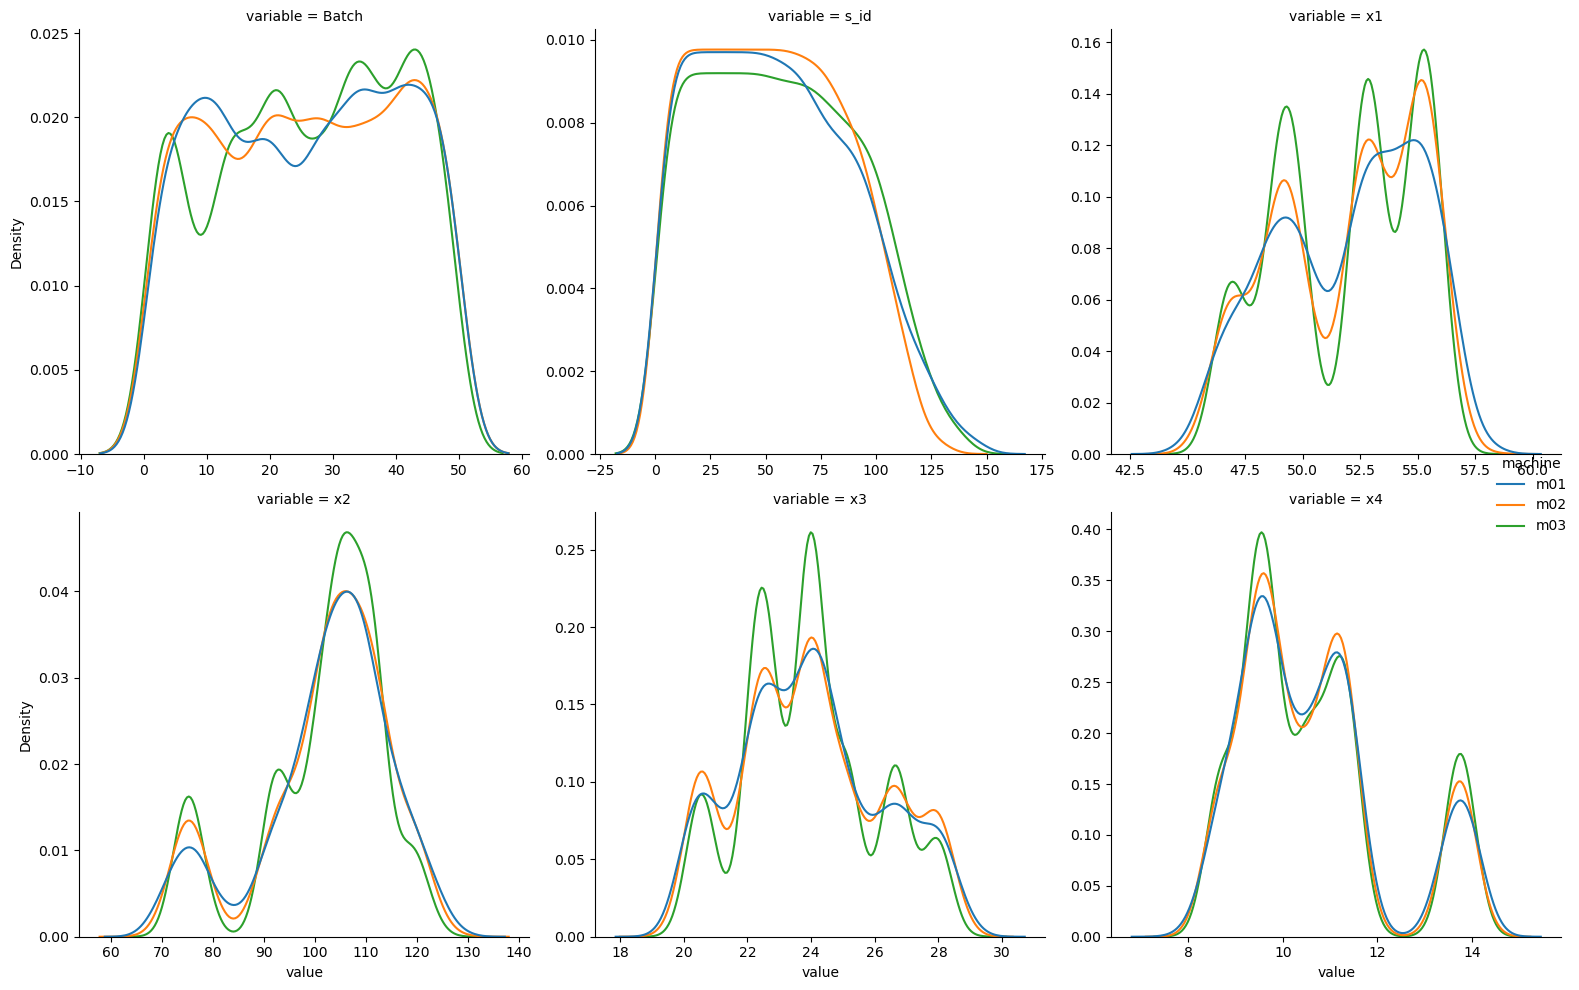

In [49]:
sns.displot(data = df_lf,  
            hue='machine', 
            x='value', col='variable', 
            kind='kde',
            facet_kws={'sharex': False, 'sharey': False},
            common_norm=False,
            col_wrap=3)
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.tight_layout()
plt.show()

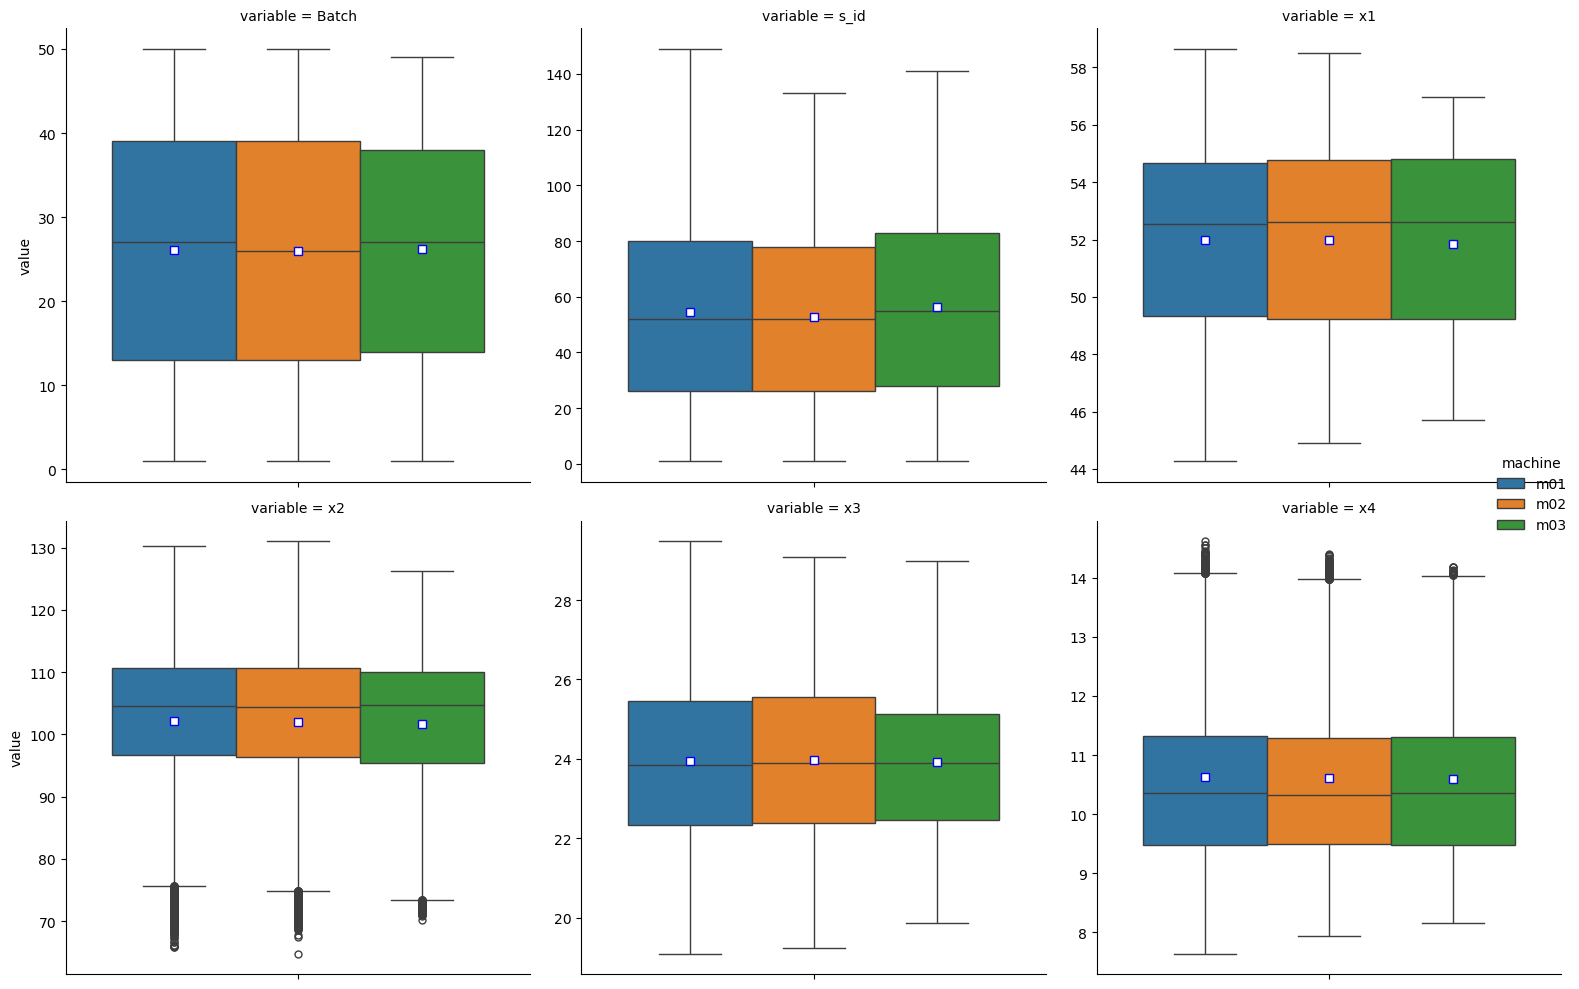

In [61]:
sns.catplot(data = df_lf,  hue='machine', y='value', col='variable', 
            kind='box',
            sharey=False,
            showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"},
            col_wrap=3)
# plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

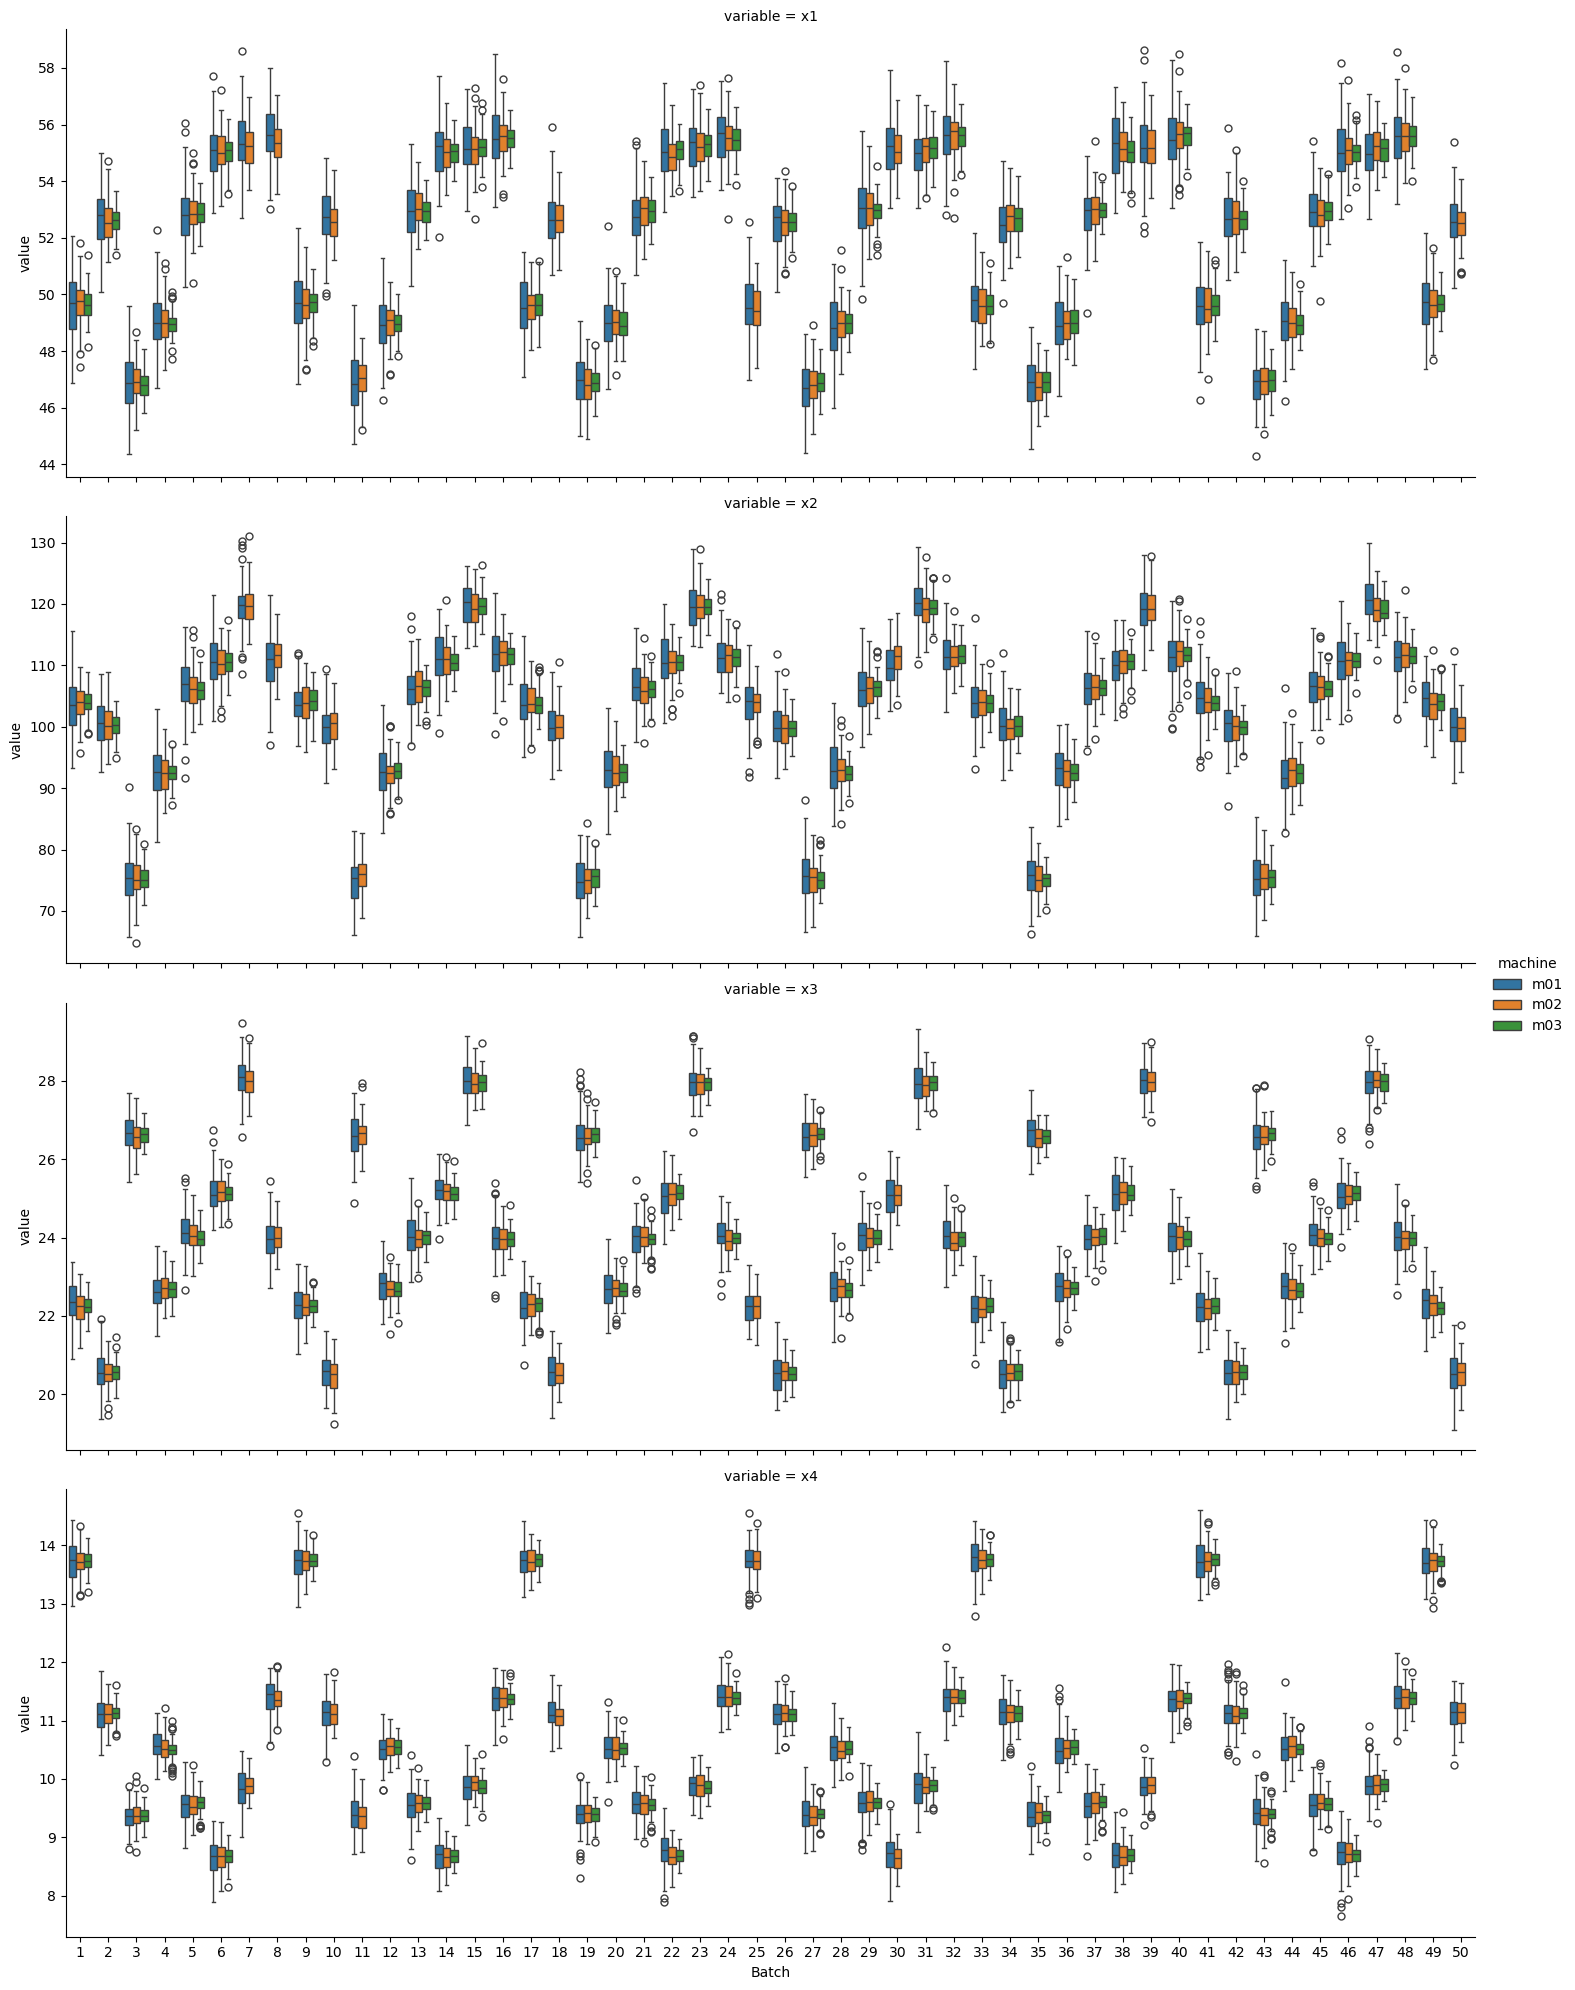

In [95]:
sns.catplot(data = df_lf, x='Batch', y='value', col='variable', col_wrap=1, aspect=3,
            kind='box',
            hue='machine',
            sharey=False)

plt.show()

In [63]:
machine_df.groupby('machine')['x1'].describe()

count       mean       std        min        25%        50%  \
machine                                                                 
m01      5152.0  51.998218  3.151912  44.275379  49.335776  52.536206   
m02      5119.0  51.989377  3.095129  44.896759  49.240567  52.610949   
m03      4458.0  51.857672  3.022646  45.690397  49.228020  52.598712   

               75%        max  
machine                        
m01      54.662490  58.647186  
m02      54.785418  58.503441  
m03      54.810528  56.981029

In [80]:
m01_df.describe()

Batch         s_id           x1           x2           x3  \
count  5152.000000  5152.000000  5152.000000  5152.000000  5152.000000   
mean     26.047748    54.540373    51.998218   102.207011    23.947216   
std      14.560368    33.650665     3.151912    12.888171     2.269325   
min       1.000000     1.000000    44.275379    65.810729    19.095832   
25%      13.000000    26.000000    49.335776    96.610288    22.334048   
50%      27.000000    52.000000    52.536206   104.487824    23.855690   
75%      39.000000    80.000000    54.662490   110.609442    25.448356   
max      50.000000   149.000000    58.647186   130.228828    29.477213   

                x4  
count  5152.000000  
mean     10.628436  
std       1.542291  
min       7.644190  
25%       9.479969  
50%      10.356002  
75%      11.318120  
max      14.612911

In [81]:
m02_df.describe()

Batch         s_id           x1           x2           x3  \
count  5119.000000  5119.000000  5119.000000  5119.000000  5119.000000   
mean     25.929674    52.754444    51.989377   101.998905    23.982312   
std      14.595274    31.263876     3.095129    12.834348     2.275809   
min       1.000000     1.000000    44.896759    64.774007    19.232164   
25%      13.000000    26.000000    49.240567    96.325502    22.372944   
50%      26.000000    52.000000    52.610949   104.357308    23.894465   
75%      39.000000    78.000000    54.785418   110.672960    25.546656   
max      50.000000   133.000000    58.503441   131.009046    29.093229   

                x4  
count  5119.000000  
mean     10.605275  
std       1.523140  
min       7.934064  
25%       9.492226  
50%      10.329911  
75%      11.286062  
max      14.400437

In [82]:
m03_df.describe()

Batch         s_id           x1           x2           x3  \
count  4458.00000  4458.000000  4458.000000  4458.000000  4458.000000   
mean     26.24428    56.475774    51.857672   101.650057    23.927679   
std      14.28990    33.827427     3.022646    12.243012     2.035196   
min       1.00000     1.000000    45.690397    70.192150    19.865338   
25%      14.00000    28.000000    49.228020    95.381831    22.457249   
50%      27.00000    55.000000    52.598712   104.712727    23.900193   
75%      38.00000    83.000000    54.810528   110.050211    25.142293   
max      49.00000   141.000000    56.981029   126.332105    28.972747   

                x4  
count  4458.000000  
mean     10.602371  
std       1.554708  
min       8.155668  
25%       9.475467  
50%      10.351781  
75%      11.301126  
max      14.182623

In [64]:
machine_df.groupby('machine')['x2'].describe()

count        mean        std        min        25%         50%  \
machine                                                                    
m01      5152.0  102.207011  12.888171  65.810729  96.610288  104.487824   
m02      5119.0  101.998905  12.834348  64.774007  96.325502  104.357308   
m03      4458.0  101.650057  12.243012  70.192150  95.381831  104.712727   

                75%         max  
machine                          
m01      110.609442  130.228828  
m02      110.672960  131.009046  
m03      110.050211  126.332105

In [65]:
machine_df.groupby('machine')['x3'].describe()

count       mean       std        min        25%        50%  \
machine                                                                 
m01      5152.0  23.947216  2.269325  19.095832  22.334048  23.855690   
m02      5119.0  23.982312  2.275809  19.232164  22.372944  23.894465   
m03      4458.0  23.927679  2.035196  19.865338  22.457249  23.900193   

               75%        max  
machine                        
m01      25.448356  29.477213  
m02      25.546656  29.093229  
m03      25.142293  28.972747

In [66]:
machine_df.groupby('machine')['x4'].describe()

count       mean       std       min       25%        50%  \
machine                                                               
m01      5152.0  10.628436  1.542291  7.644190  9.479969  10.356002   
m02      5119.0  10.605275  1.523140  7.934064  9.492226  10.329911   
m03      4458.0  10.602371  1.554708  8.155668  9.475467  10.351781   

               75%        max  
machine                        
m01      11.318120  14.612911  
m02      11.286062  14.400437  
m03      11.301126  14.182623

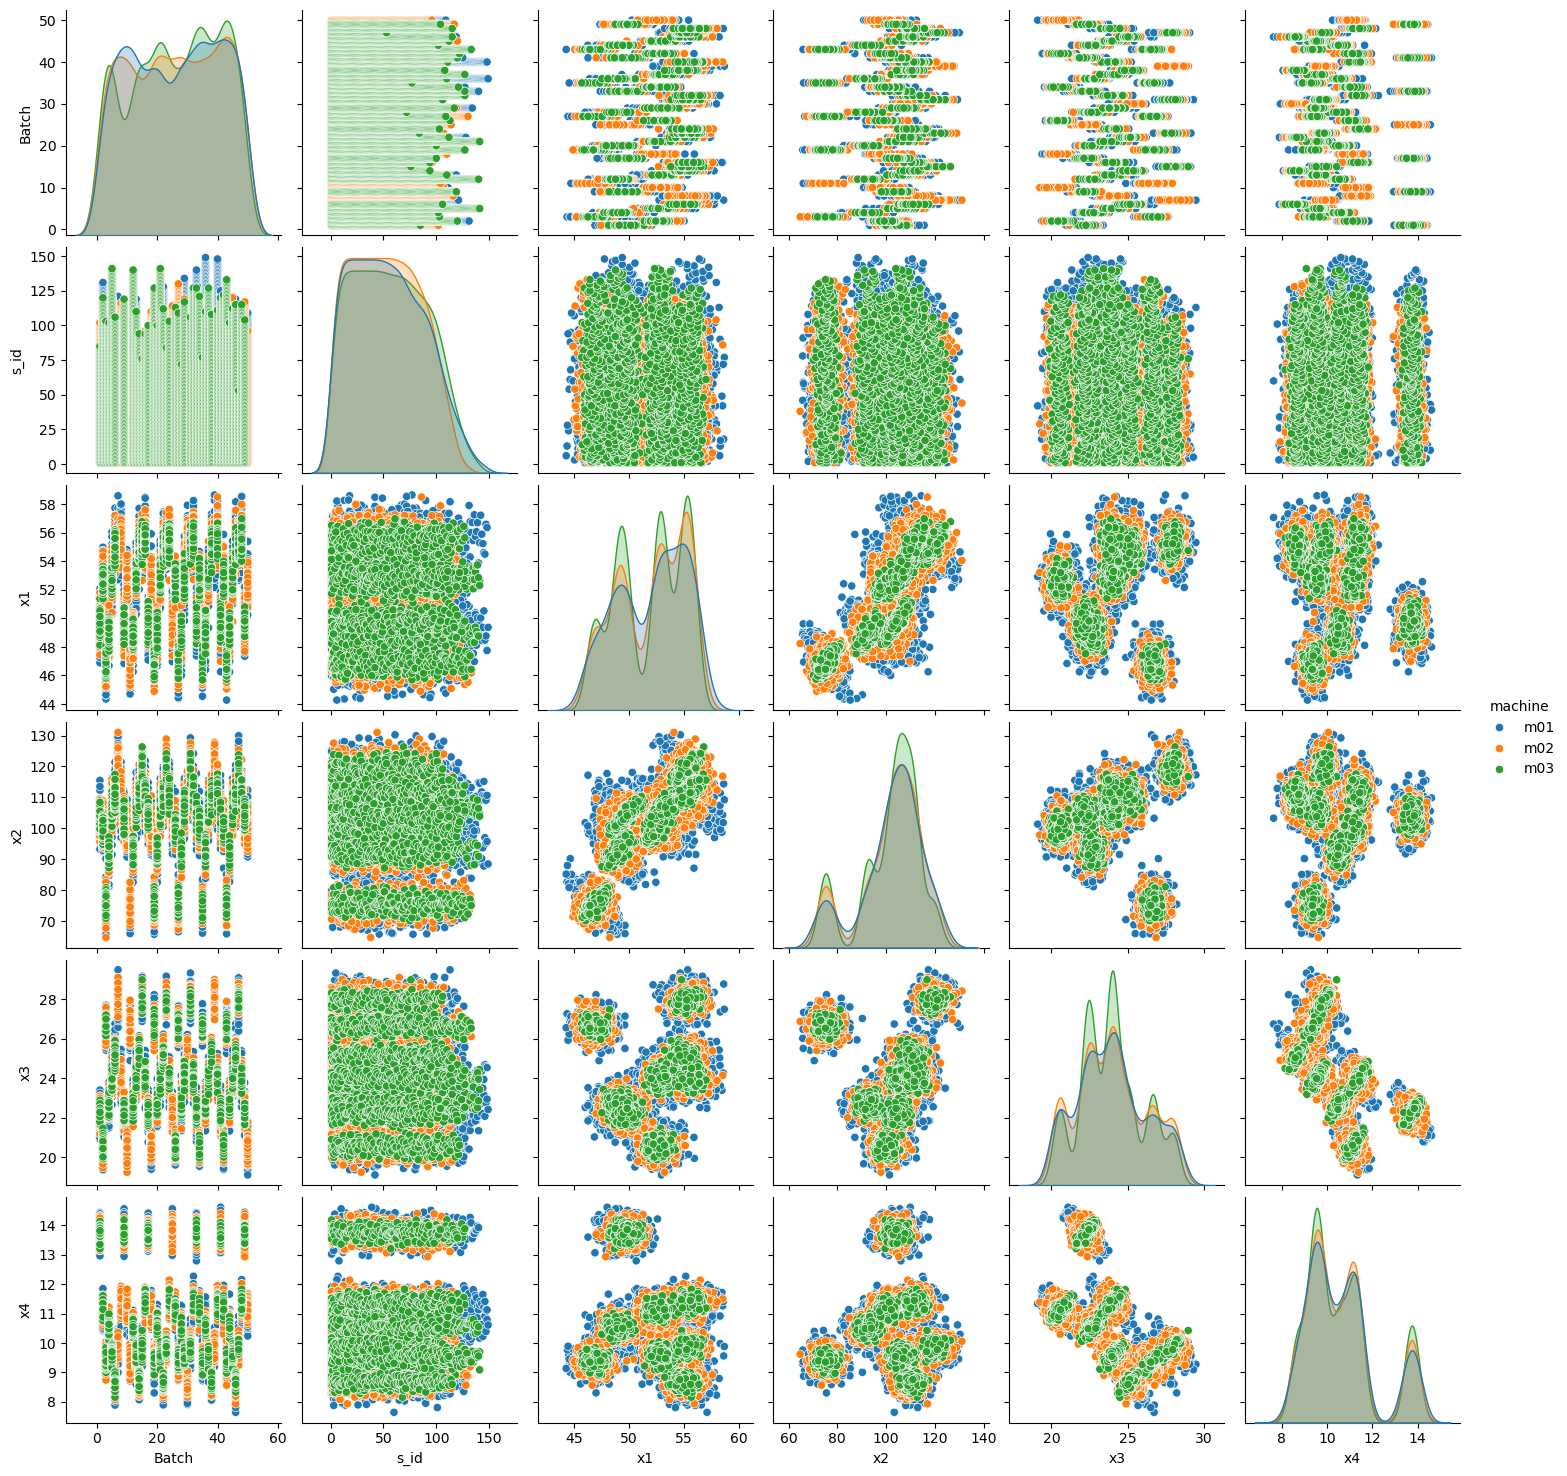

In [79]:
sns.pairplot(data=machine_df,
             hue='machine',
             diag_kws={'common_norm': False})

plt.show()

In [13]:
df_lf.Batch.nunique()

50

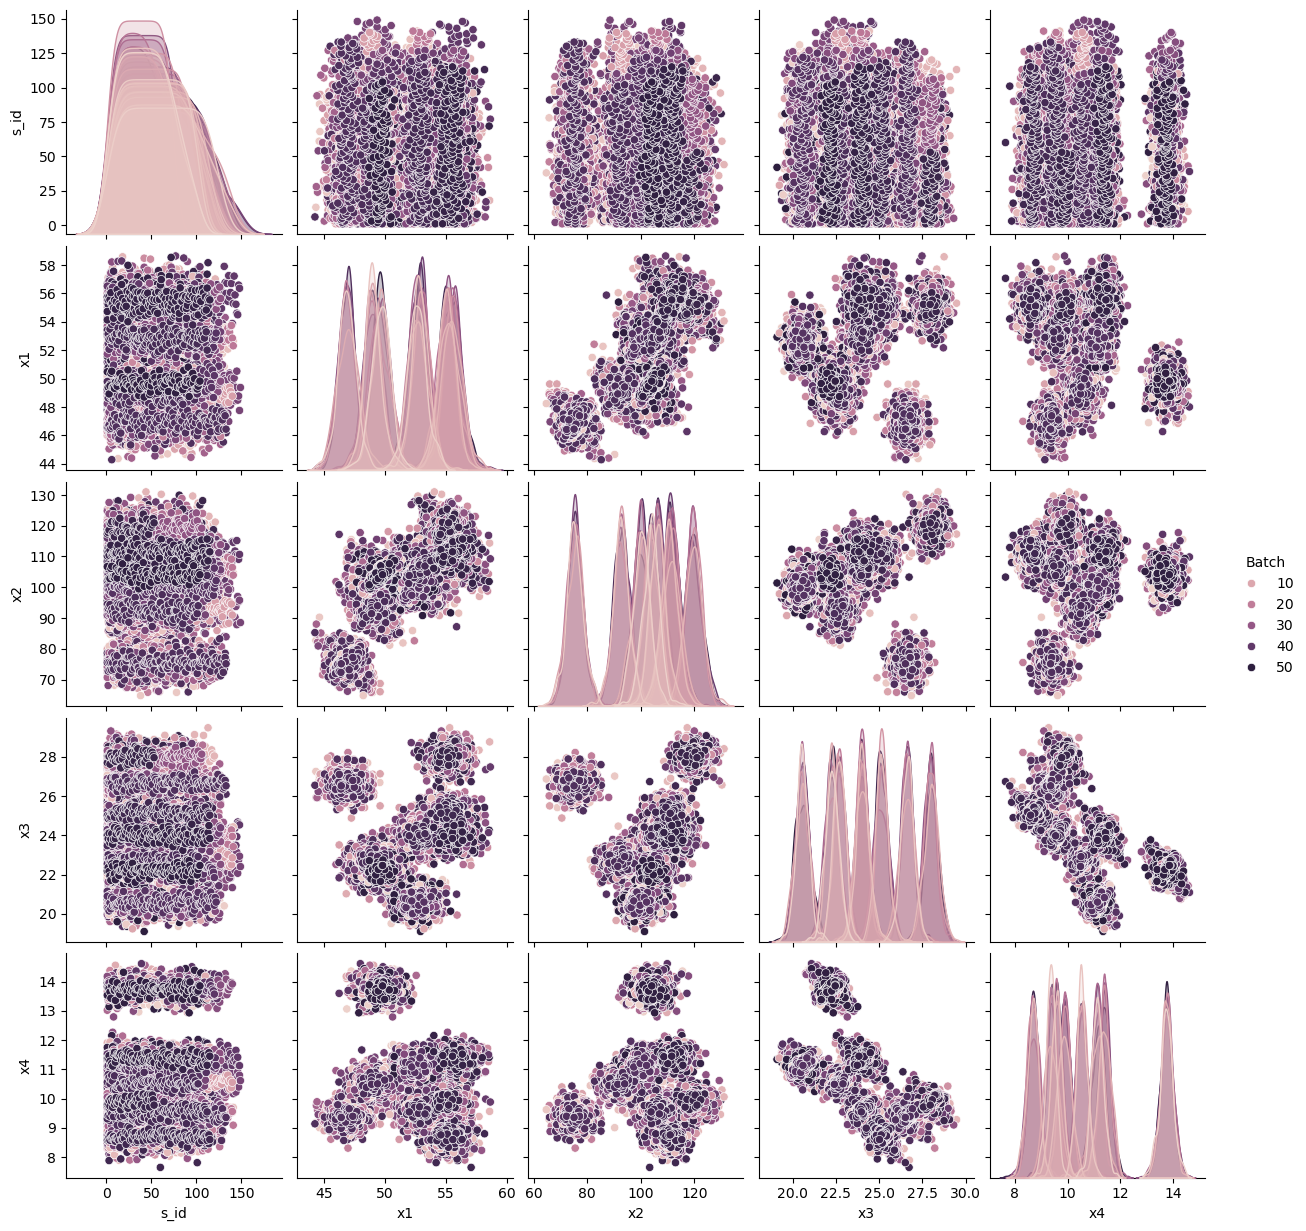

In [85]:
sns.pairplot(data=machine_df,
             hue='Batch',
             diag_kws={'common_norm': False})

plt.show()

In [12]:
# concatenate the 3 DataFrames into a single DataFrame which includes the `machine_id` variable

machine_df = pd.concat([m01_df, m02_df, m03_df])
machine_df.head()

ID  Batch  s_id         x1          x2         x3         x4
0  B001-M01-S001      1     1  50.117118  102.167346  22.067812  13.889524
1  B001-M01-S002      1     2  46.887333  112.266102  23.197330  13.064709
2  B001-M01-S003      1     3  50.132744  103.674908  22.319933  13.647482
3  B001-M01-S004      1     4  48.501042  107.143156  22.162947  14.077758
4  B001-M01-S005      1     5  49.690442  102.120283  22.248696  13.728666

## Problem 02

The supplier batch data set file name is provided for you below. You must read in the CSV file and assign the data set to the `batch_df` object. 

You must perform the following **ESSENTIAL** activities:

* How many rows and columns are in the data? 
* What are the names and data types for each column?
* How many unique values are there for each column?
* How many missing values are there for each column?

You must visually explore the MARGINAL behavior of the variables in the data. You must use visualizations appropriate for the DATA TYPE of the columns.

You must visually explore RELATIONSHIPS between variables in the data. You must use visualizations appropriate for the DATA TYPES. You must make sure that your visualizations can answer the following questions:
* Do the summary statistics for `Density` depend on the `Supplier`?
* Does the average `Density` depend on the `Supplier`?
* How does `Density` relate to `Batch` for each `Supplier`?

After exploring the `batch_df` DataFrame, you **MUST** JOIN/MERGE the `batch_df` DataFrame with the `machine_df` DataFrame. Assign the merged DataFrame to the `dfa` DataFrame.

You can now explore the relationships between the MACHINE OPERATIONAL VARIABLES and the SUPPLIERS! You must use visualizations to explore the following relationships:
* Explore if the summary statistics of the 4 OPERATING VARIABLES `x1` through `x4` vary across `Batch` for each MACHINE given each `Supplier`. Your figures MUST use `Batch` as the x-axis variable.
* Explore if the relationships between the 4 OPERATING VARIABLES `x1` through `x4` vary across `Supplier`.

You may add as many markdown and code cells as you see fit to answer this question.

#### SOLUTION

In [ ]:
# define the batch supplier file
batch_file = 'midterm_supplier.csv'

In [ ]:
# read in the batch supplier data set

batch_df =

In [ ]:
# merge the batch supplier data set with the (concatenated) machine data set

dfa =

## Problem 03

The DROP TEST result data set file name is provided for you below. You must read in the CSV file and assign the dta set to the `test_df` object. 

You must perform the following **ESSENTIAL** activities:

* How many rows and columns are in the data? 
* What are the names and data types for each column?
* How many unique values are there for each column?
* How many missing values are there for each column?

You must visually explore the MARGINAL behavior of the variables in the data. You must use visualizations appropriate for the DATA TYPE of the columns.

You must visually explore RELATIONSHIPS between variables in the data. You must use visualizations appropriate for the DATA TYPES. You must make sure that your visualizations can answer the following questions:
* Count the number of times each unique value of `Result` occurs for each `test_group_id` value.

After exploring the `test_df` DataFrame, you **MUST** JOIN/MERGE the `test_df` DataFrame with the `dfa` DataFrame. Assign the merged DataFrame to the `dfb` DataFrame. You **MUST** answer the following:
* How many rows remain using the DEFAULT joining procedure?

You may add as many markdown and code cells as you see fit to answer this question. 

#### SOLUTION

In [ ]:
# define the test data set file name
test_file = 'midterm_test.csv'

In [ ]:
# read in the test data set

test_df =

In [ ]:
# merge test_df with the dfa object

dfb = 

## Problem 04

You must now examine the merged `dfb` object and answer the following:

* Count the number of times each unique value of `Result` occurs for each value of `machine_id`.
* Count the number of times each unique value of `Result` occurs for each value of `Supplier`.
* Visualize the number of times each unique value of `Result` occurs per `Batch` for each value of `machine_id`.
* Visualize the number of times each unique value of `Result` occurs per `Batch` for each value of `machine_id` and `Supplier`.
* Calculate the PROPORTION of times the cell phone case failed the test in each `Batch` per `machine_id`.
* Visualize the PROPORTION of times the cell phone case failed the test in each `Batch` per `machine_id` and for each unique value of `Supplier`.

*HINT*: Remember that a FAILED test is encoded as `Result == 1`. How can you calculate the PROPORTION of times `Result == 1`?

Add as many cells as you see fit to answer this question.

#### SOLUTION

## Problem 05

You must cluster the rows of `dfb` using the 4 operational variables `x1` through `x4`. You must decide how many clusters to use and describe how you made that choice. You may use KMeans OR Hierarchical clustering. Include any figures that helped you make that choice.

Visualize your cluster analysis results by:
* Plotting the number of observations per cluster.
* Visualizing the relationships between the operational variables GIVEN the cluster.

You are interested in the PROPORTION of cell phone cases that failed the DROP TEST. Are any of the clusters associated with higher failure PROPORTIONS than others? Based on your visualizations how would you describe that cluster?

Add as many cells as you see fit to answer this question.

#### SOLUTION